# Data Summary #

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [75]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install seaborn[stats]

zsh:1: no matches found: seaborn[stats]
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("/Users/benchen/NeuralHub/DRKM_Mouse_Jun25/young_cohort_execution_df.csv")
print(df.columns)

Index(['Mouse', 'Age_Groups', 'Trial', 'blockTrial', '0_ITI',
       '0_trialDuration', 'Decision', '1_Port', '1_Reward', '1_ITI',
       '1_trialDuration', '2_Port', '2_Reward', '2_ITI', '2_trialDuration',
       '3_Port', '3_Reward', '3_ITI', '3_trialDuration', 'highPort', 'Reward',
       'Mouse ID', 'Session ID', 'Condition', 'Switch', 'laser_stim', 'Target',
       'Block ID', 'blockLength', 'session_pos', 'retrain', 'DOB', 'Sex',
       'Start_Age', 'Cohort_Name', 'Trial_based', 'Fibers',
       'Dreadds_During_Training', 'Viral_expression', 'Genotype',
       'Date_of_Surgery', 'Date', 'Current_age', 'Session_Number',
       'block_pos_rev'],
      dtype='object')


In [3]:
# Assuming data_tmp is your dataframe with trial-level data
# Create an empty list to store each session's summary data
summary_data = []

data_df = df[df['Condition'] == '80-20']  # Filter for retrain == 0

In [4]:
#Visualize data_df
data_df[['Reward','1_Reward','2_Reward']] 

,Reward,1_Reward,2_Reward
0,0,1,1
1,0,0,1
2,1,0,0
3,1,1,0
4,1,1,1
...,...,...,...
90639,1,1,1
90640,1,1,1
90641,1,1,1
90642,1,1,1


In [5]:
unique_sessions = data_df.Session_Number.unique()

print(unique_sessions)

[ 5  6  7  8  9 10]


In [6]:
#Compute summary statistics per session
num_trials = len(session_data)

NameError: name 'session_data' is not defined

In [7]:
#New column with mouse and session number specified
data_df['Session_ID'] = data_df.Mouse.astype(str) + "_Session" + data_df['Session_Number'].astype(str)

print(data_df.Session_ID.head())

0    YC1N_Session5
1    YC1N_Session5
2    YC1N_Session5
3    YC1N_Session5
4    YC1N_Session5
Name: Session_ID, dtype: object


In [9]:
#Identifying unique Mouse and Session combination in the data_df column
unique_mouse_sessions = data_df.Session_ID.unique()
print(unique_mouse_sessions)

['YC1N_Session5' 'YC1N_Session6' 'YC1N_Session7' 'YC1N_Session8'
 'YC1N_Session9' 'YC1N_Session10' 'YC1L_Session5' 'YC1L_Session6'
 'YC1L_Session7' 'YC1L_Session8' 'YC1L_Session9' 'YC1R_Session5'
 'YC1R_Session6' 'YC1R_Session7' 'YC1R_Session8' 'YC1R_Session9'
 'YC1R_Session10' 'YC1B_Session5' 'YC1B_Session6' 'YC1B_Session7'
 'YC1B_Session8' 'YC1B_Session9' 'YC1B_Session10' 'YC2N_Session5'
 'YC2N_Session6' 'YC2N_Session7' 'YC2N_Session8' 'YC2N_Session9'
 'YC2N_Session10' 'YC2L_Session5' 'YC2L_Session6' 'YC2L_Session7'
 'YC2L_Session8' 'YC2L_Session9' 'YC2L_Session10' 'YC2R_Session5'
 'YC2R_Session6' 'YC2R_Session7' 'YC2R_Session8' 'YC2R_Session9'
 'YC2R_Session10' 'YC2B_Session5' 'YC2B_Session6' 'YC2B_Session7'
 'YC2B_Session8' 'YC2B_Session9' 'YC2B_Session10' 'YC3N_Session5'
 'YC3N_Session6' 'YC3N_Session7' 'YC3N_Session8' 'YC3N_Session9'
 'YC3N_Session10' 'YC3L_Session5' 'YC3L_Session6' 'YC3L_Session7'
 'YC3L_Session8' 'YC3L_Session9' 'YC3L_Session10' 'YC3BLL_Session5'
 'YC3BLL_Sessi

In [10]:
#Initialize summary_data list
summary_data = []


#calculate metrics for each unique mouse session
for session_id in unique_mouse_sessions:

    #Slicing the dataframe, so that the portion for the specific mouse/session is obtained
    session_data = data_df[data_df['Session_ID'] == session_id]
    
    #Calculating the statistics of the dataframe
    num_trials = len(session_data)
    num_reward = session_data['Reward'].sum()
    num_switch = session_data["Switch"].sum()

    reward_rate = num_reward / num_trials
    switch_rate = num_switch / num_trials
    
    mean_trial_duration = session_data['0_trialDuration'].mean()
    mean_ITI = session_data['0_ITI'].mean()

    sex = session_data['Sex'].unique()[0]

    age_at_recording = session_data['Current_age'].unique()[0]
    age_group = session_data['Age_Groups'].unique()[0]

    session_summary = {
        'Session': session_id,
        'Sex': sex,
        'NumTrials': num_trials,
        'NumRewards': num_reward,
        'NumSwitches': num_switch,
        'RewardRate': reward_rate,
        'SwitchRate': switch_rate,
        'MeanTrialDuration': mean_trial_duration, 
        'MeanITI': mean_ITI,
        'Age_at_Recording': age_at_recording,
        'Age_Groups': age_group

    }
    
    summary_data.append(session_summary)

summary_df = pd.DataFrame(summary_data)

summary_df






,Session,Sex,NumTrials,NumRewards,NumSwitches,RewardRate,SwitchRate,MeanTrialDuration,MeanITI,Age_at_Recording,Age_Groups
0,YC1N_Session5,female,487,301,69,0.618070,0.141684,0.355977,2.066589,49,0
1,YC1N_Session6,female,468,280,49,0.598291,0.104701,0.345192,2.375543,50,0
2,YC1N_Session7,female,495,282,62,0.569697,0.125253,0.331806,2.037683,51,0
3,YC1N_Session8,female,498,289,53,0.580321,0.106426,0.374554,2.115400,52,0
4,YC1N_Session9,female,507,305,46,0.601578,0.090730,0.341838,2.325314,53,0
...,...,...,...,...,...,...,...,...,...,...,...
184,YC8B_Session6,male,484,283,64,0.584711,0.132231,0.384874,2.394568,45,0
185,YC8B_Session7,male,544,347,57,0.637868,0.104779,0.344857,2.111094,46,0
186,YC8B_Session8,male,578,346,60,0.598616,0.103806,0.353161,2.120507,49,0
187,YC8B_Session9,male,709,386,52,0.544429,0.073343,0.316670,2.033258,50,0


.fillna(0) is a pandas method that replaces all NaN in a dataframe with 0

In [11]:
#Initialize lose_switch count column
data_df['lose_switch'] = 0
data_df['win-stay'] = 0

#Initialize previous Reward column (Shift 'Reward' column down by 1 unit)
data_df['Prev_Reward'] = data_df['Reward'].shift(1).fillna(0).astype(int)

#data_df['Prev_Reward'] = data_df['Prev_Reward'].replace({1.0: 1, 0.0: 0})


print(data_df[['Reward', 'Prev_Reward']].head())

   Reward  Prev_Reward
0       0            0
1       0            0
2       1            0
3       1            1
4       1            1


In [12]:
#Calculate the number and percentage of "Win-Stay, Loss-Switch" in each session

#initialize session_data, to avoid inheritance of unwanted data
session_data = []

#initialize wsls_data
wsls_data = []

for session_id in unique_mouse_sessions:
    session_data = data_df[data_df['Session_ID'] == session_id]

    #num_lose_switch = ((session_data['Prev_Reward'] == 0) & (session_data['Switch'] == 1)).sum() #Count how many times previous reward is 0, and switching occurs (1)
    #num_win_stay = ((session_data['Prev_Reward'] == 1) &(session_data['Switch'] == 0)).sum() #Count how many times previous reward is 1, and switching doesn't occurs (0)

    num_lose_switch = (session_data['Prev_Reward'] < session_data['Switch']).sum() #Count how many times previous reward is 0, and switching occurs (1)
    num_win_stay = (session_data['Prev_Reward'] > session_data['Switch']).sum() #Count how many times previous reward is 1, and switching doesn't occurs (0)

    #num_lose_stay = (session_data['Prev_Reward'] + session_data['Switch'] == 0).count()
    num_lose_stay = ((session_data['Prev_Reward'] == 0) & (session_data['Switch'] == 0)).sum()
    num_win_switch = (session_data['Prev_Reward'] + session_data['Switch'] == 2).sum()

    print(f"LS: {num_lose_switch}")
    print(f"WS:{num_win_stay}")

    num_win_stay_lose_switch = num_win_stay + num_lose_switch
    num_win_switch_lose_stay = num_win_switch + num_lose_stay


    wsls_summary = {
        'Session_ID' : session_id,
        'Lose_Switch' : num_lose_switch,
        'Win_Stay' : num_win_stay,
        'Lose_Stay': num_lose_stay,
        'Win_Switch': num_win_switch,
        'Win_Stay_Lose_Switch': num_win_stay_lose_switch,
        'Win_Switch_Lose_Stay': num_win_switch_lose_stay
    }

    wsls_data.append(wsls_summary)

wsls_df = pd.DataFrame(wsls_data)

wsls_df





    

LS: 59
WS:290
LS: 35
WS:266
LS: 47
WS:267
LS: 48
WS:284
LS: 34
WS:293
LS: 32
WS:301
LS: 64
WS:322
LS: 63
WS:330
LS: 44
WS:230
LS: 47
WS:314
LS: 40
WS:280
LS: 64
WS:251
LS: 61
WS:281
LS: 66
WS:272
LS: 49
WS:284
LS: 62
WS:346
LS: 58
WS:304
LS: 73
WS:316
LS: 68
WS:287
LS: 54
WS:311
LS: 52
WS:212
LS: 59
WS:276
LS: 64
WS:360
LS: 42
WS:290
LS: 56
WS:326
LS: 36
WS:237
LS: 43
WS:247
LS: 36
WS:281
LS: 47
WS:282
LS: 12
WS:142
LS: 7
WS:142
LS: 28
WS:191
LS: 28
WS:149
LS: 31
WS:209
LS: 19
WS:125
LS: 46
WS:181
LS: 42
WS:147
LS: 44
WS:238
LS: 49
WS:307
LS: 50
WS:246
LS: 45
WS:199
LS: 41
WS:153
LS: 33
WS:185
LS: 35
WS:168
LS: 37
WS:211
LS: 28
WS:157
LS: 22
WS:219
LS: 22
WS:250
LS: 39
WS:179
LS: 40
WS:188
LS: 32
WS:215
LS: 41
WS:191
LS: 68
WS:329
LS: 48
WS:271
LS: 33
WS:254
LS: 51
WS:355
LS: 55
WS:227
LS: 37
WS:285
LS: 33
WS:290
LS: 34
WS:262
LS: 44
WS:183
LS: 59
WS:247
LS: 56
WS:253
LS: 67
WS:213
LS: 51
WS:230
LS: 55
WS:209
LS: 23
WS:260
LS: 11
WS:274
LS: 53
WS:250
LS: 46
WS:220
LS: 77
WS:264
LS: 85


,Session_ID,Lose_Switch,Win_Stay,Lose_Stay,Win_Switch,Win_Stay_Lose_Switch,Win_Switch_Lose_Stay
0,YC1N_Session5,59,290,128,10,349,138
1,YC1N_Session6,35,266,153,14,301,167
2,YC1N_Session7,47,267,166,15,314,181
3,YC1N_Session8,48,284,161,5,332,166
4,YC1N_Session9,34,293,168,12,327,180
...,...,...,...,...,...,...,...
184,YC8B_Session6,50,269,151,14,319,165
185,YC8B_Session7,47,336,151,10,383,161
186,YC8B_Session8,45,331,187,15,376,202
187,YC8B_Session9,47,382,275,5,429,280


In [22]:
#Customize Seaborn Color 

# Define a custom color palette using RGB values
custom_palette = [(0.6, 0.8, 1.0), (0.8, 1.0, 0.6)]


/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_35543/1827453204.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Policy', y = 'Count', data=wsls_boxplot_df, palette=custom_palette).set(title='Extent to Which Mouse Adopt Win-Stay-Lose-Switch Policy')


[Text(0.5, 1.0, 'Extent to Which Mouse Adopt Win-Stay-Lose-Switch Policy')]

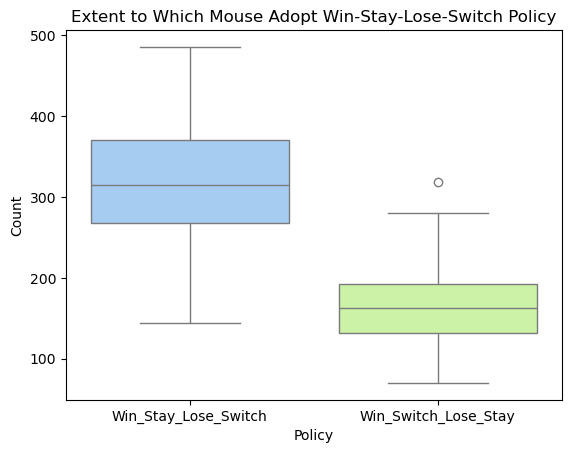

In [24]:
#Visualize Win-Stay-Lose-swtich data

win_stay_lose_switch_stats = []
win_switch_lose_stay_stats = []
win_stay_lose_switch_stats = wsls_df['Win_Stay_Lose_Switch']
win_switch_lose_stay_stats = wsls_df['Win_Switch_Lose_Stay']
#print(f'wsls1: {win_switch_lose_stay_stats}')
#print(f'wsls2: {win_stay_lose_switch_stats}')

#Combine two plots into a DataFrame
wsls_boxplot_df = pd.DataFrame({
    'Count': list(win_stay_lose_switch_stats) + list(win_switch_lose_stay_stats),
    'Policy': (['Win_Stay_Lose_Switch'] * len(win_stay_lose_switch_stats)) + (['Win_Switch_Lose_Stay'] * len(win_switch_lose_stay_stats))

})



sns.boxplot(x='Policy', y = 'Count', data=wsls_boxplot_df, palette=custom_palette).set(title='Extent to Which Mouse Adopt Win-Stay-Lose-Switch Policy')





In [14]:
test_wsls = data_df[data_df['Session_ID'] == "YC1N_Session5"]

print(test_wsls[['Reward','Prev_Reward','Switch']])

     Reward  Prev_Reward  Switch
0         0            0       0
1         0            0       0
2         1            0       1
3         1            1       1
4         1            1       0
..      ...          ...     ...
482       0            0       0
483       0            0       0
484       0            0       0
485       0            0       1
486       1            0       0

[487 rows x 3 columns]
